# **Data Cleaning Guide**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.preprocessing import PowerTransformer, StandardScaler, scale

In [2]:
sns.set_theme(context='talk', style='ticks', font_scale=.7, rc={'axes.labelpad': 15, 'axes.titlepad': 20})

In [3]:
os.listdir('./data/olist')

['product_category_name_translation.csv',
 'olist_sellers_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv']

**Upload file olist_dataset.zip**

In [4]:
# # Load and unzip data
# !unzip olist_dataset.zip
# !7z x olist_dataset.zip
# %%time

In [5]:
# Read csv files and save them into a dictionary
files = [file for file in os.listdir('./data/olist') if file.endswith('.csv')]
print(files)
data = {file[:-4]: pd.read_csv(f'./data/olist/{file}') for file in files}

['product_category_name_translation.csv', 'olist_sellers_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_customers_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_order_items_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv']


### Explore data

In [6]:
# Show shape and first rows
for file_name, file_data in data.items():
  print(file_name, file_data.shape)
  display(file_data.head())
  print('\n')

product_category_name_translation (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




olist_sellers_dataset (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP




olist_order_payments_dataset (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




olist_customers_dataset (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




olist_order_reviews_dataset (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




olist_products_dataset (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




olist_order_items_dataset (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




olist_geolocation_dataset (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




olist_orders_dataset (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# Show missing values counts
for file_name, file_data in data.items():
  print(f'\033[1;30m{file_name}\033[0m')
  print(file_data.isna().sum(), '\n')

product_category_name_translation
product_category_name            0
product_category_name_english    0
dtype: int64 

olist_sellers_dataset
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64 

olist_order_payments_dataset
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

olist_customers_dataset
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

olist_order_reviews_dataset
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

olist_products_dataset
product_id                      0
product_category_name         610
prod

### Merge data

Join the following datasets (with common column):

- `olist_orders_dataset` (source)
- `olist_order_items_dataset` (column `order_id`)
- `olist_products_datasets` (column `product_id`)

In [8]:
df = (
  # complete  
  data['olist_orders_dataset']
  .merge(data['olist_order_items_dataset'], on='order_id')
  .merge(data['olist_products_dataset'], on='product_id')
)

print(df.shape)
df.head()

(112650, 22)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


# **Review - Data Cleaning** (Part 1)

## Data types

Checking for column types and null values

- Method: [pd.DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [9]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

### Converting date

- Method 1: [pd.DataFrame.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
- Method 2: [pd.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime)

_Hint_: `format='%Y-%m-%d %H:%M:%S'`

In [11]:
date_cols = [
  'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
  'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date'
]

# complete
df[date_cols].astype('datetime64').head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15
1,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2017-08-21 20:05:16
2,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,2017-08-08 18:37:31
3,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,2017-10-31 02:14:11
4,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27


In [12]:
pd.to_datetime(df[date_cols[0]], format='%Y-%m-%d %H:%M:%S')

0        2017-10-02 10:56:33
1        2017-08-15 18:29:31
2        2017-08-02 18:24:47
3        2017-10-23 23:26:46
4        2018-07-24 20:41:37
                 ...        
112645   2017-08-10 21:21:07
112646   2017-08-10 21:21:07
112647   2017-12-20 09:52:41
112648   2017-03-09 09:54:05
112649   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 112650, dtype: datetime64[ns]

In [13]:
df[date_cols] = df[date_cols].astype('datetime64')

**Converting datetime to string**

- Method: [pd.Series.dt.strftime()](pandas.Series.dt.strftime)

_Hint_: choose a datetime column

In [14]:
df[date_cols[0]].dt.strftime('%Y%m%d')

0         20171002
1         20170815
2         20170802
3         20171023
4         20180724
            ...   
112645    20170810
112646    20170810
112647    20171220
112648    20170309
112649    20180308
Name: order_purchase_timestamp, Length: 112650, dtype: object

**Other datetime attributes**

- pd.Series.dt.date
- pd.Series.dt.month
- pd.Series.dt.year

In [15]:
df[date_cols[0]].dt.date

0         2017-10-02
1         2017-08-15
2         2017-08-02
3         2017-10-23
4         2018-07-24
             ...    
112645    2017-08-10
112646    2017-08-10
112647    2017-12-20
112648    2017-03-09
112649    2018-03-08
Name: order_purchase_timestamp, Length: 112650, dtype: object

### Converting categories

Pandas category [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html):
>_Converting a string variable consisting of only a few different values to a categorical variable will save some memory._

In [16]:
# complete
df['product_category_name_'] = df['product_category_name'].astype('category')

In [17]:
%timeit df.groupby('product_category_name').count()

160 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit df.groupby('product_category_name_').count()

156 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

## Treating strings

In [20]:
df['product_category_name'].sort_values().unique()

array(['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas',
       'artes', 'artes_e_artesanato', 'artigos_de_festas',
       'artigos_de_natal', 'audio', 'automotivo', 'bebes', 'bebidas',
       'beleza_saude', 'brinquedos', 'cama_mesa_banho', 'casa_conforto',
       'casa_conforto_2', 'casa_construcao', 'cds_dvds_musicais',
       'cine_foto', 'climatizacao', 'consoles_games',
       'construcao_ferramentas_construcao',
       'construcao_ferramentas_ferramentas',
       'construcao_ferramentas_iluminacao',
       'construcao_ferramentas_jardim',
       'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray',
       'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos',
       'eletroportateis', 'esporte_lazer', 'fashion_bolsas_e_acessorios',
       'fashion_calcados', 'fashion_esporte', 'fashion_roupa_feminina',
       'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina',
       'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores',
       'fral

In [21]:
import re

areas = [
    'alimentos', 'artes', 'artigos', 'casa', 'construcao', 'eletrodomesticos',
    'fashion', 'livros', 'moveis', 'pc', 'portateis', 'telefonia'
]

def get_product_area_name(product_category_name:str, areas:list) -> str:
  """Extract product area from product category name"""
  for area in areas:
    if re.match(pattern=area, string=product_category_name):
      return area
  return product_category_name

get_product_area_name('fashion_underwear', areas)

'fashion'

In [22]:
# complete
df['product_category_name__'] = df['product_category_name_'].apply(
    lambda x: get_product_area_name(x, areas)
)

df[['product_category_name', 'product_category_name_', 'product_category_name__']].tail(20)

,product_category_name,product_category_name_,product_category_name__
112630,perfumaria,perfumaria,perfumaria
112631,moveis_decoracao,moveis_decoracao,moveis
112632,moveis_decoracao,moveis_decoracao,moveis
112633,moveis_decoracao,moveis_decoracao,moveis
112634,moveis_decoracao,moveis_decoracao,moveis
112635,beleza_saude,beleza_saude,beleza_saude
112636,cama_mesa_banho,cama_mesa_banho,cama_mesa_banho
112637,automotivo,automotivo,automotivo
112638,alimentos_bebidas,alimentos_bebidas,alimentos
112639,telefonia_fixa,telefonia_fixa,telefonia


## Treating duplicates

**Check duplicate entries**

- Method: [pd.DataFrame.duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

In [23]:
# complete
subset = None
print (df.duplicated(subset=subset).any())
df[df.duplicated(subset=subset)]

False


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_,product_category_name__


**Remove duplicate entries** (if any)

- Method: [pd.DataFrame.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

_Hint_: check rows before/after removal

In [24]:
print (df.shape)
df.drop_duplicates(subset=None)

(112650, 24)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_,product_category_name__
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumaria,perfumaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,1,0df37da38a30a713453b03053d60d3f7,...,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,esporte_lazer,esporte_lazer
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,2,0df37da38a30a713453b03053d60d3f7,...,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,esporte_lazer,esporte_lazer
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,1,3d2c44374ee42b3003a470f3e937a2ea,...,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0,instrumentos_musicais,instrumentos_musicais
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,ac35486adb7b02598c182c2ff2e05254,...,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,beleza_saude,beleza_saude


## Treating numerical data

- Method: [pd.DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

_Hint_: parameters **include** and **percentile**

In [25]:
df.describe(include='number')
# df.select_dtypes(['number']).describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


`product_weight_g` > 0

In [26]:
# complete
df[df['product_weight_g'] == 0]
# df[df['product_weight_g'].eq(0)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_,product_category_name__
46641,06afc1144eb9f51ef2aa90ec9223c7f4,e8be078dee76002545a9c5f10b7d7c4e,delivered,2018-08-15 17:13:07,2018-08-15 17:25:20,2018-08-16 14:44:00,2018-08-24 22:54:42,2018-09-20,1,e673e90efa65a5409ff4196c038bb5af,...,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
46642,06afc1144eb9f51ef2aa90ec9223c7f4,e8be078dee76002545a9c5f10b7d7c4e,delivered,2018-08-15 17:13:07,2018-08-15 17:25:20,2018-08-16 14:44:00,2018-08-24 22:54:42,2018-09-20,2,e673e90efa65a5409ff4196c038bb5af,...,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
46643,476b812a7e4fc972646eb390517bddcb,18a1176652a9344ba489fa4ccaa3c20f,delivered,2018-08-18 11:09:12,2018-08-18 11:30:54,2018-08-21 12:07:00,2018-08-30 16:56:44,2018-09-12,1,e673e90efa65a5409ff4196c038bb5af,...,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
46644,b489f7ae130ba3fd26b0a20f8cc81c61,99411e9599f8b7a90f2a362b874b66ca,delivered,2018-08-18 20:37:22,2018-08-18 20:49:57,2018-08-20 14:20:00,2018-08-27 14:52:02,2018-09-04,1,e673e90efa65a5409ff4196c038bb5af,...,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
65953,4abc7b5330425bcf9c2f7f48151a88c0,d1568f1104d2015dc70bdf7d9ab88dd2,delivered,2018-07-31 21:05:49,2018-07-31 21:40:18,2018-08-01 16:00:00,2018-08-07 23:56:48,2018-08-17,1,8038040ee2a71048d4bdbbdc985b69ab,...,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
91532,200b121c28e10ef638131a7c76753327,26bcca10e5c9679c306d8333bf527929,delivered,2018-08-04 15:55:59,2018-08-04 16:10:16,2018-08-08 14:35:00,2018-08-23 18:21:59,2018-08-30,1,81781c0fed9fe1ad6e8c81fca1e1cb08,...,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
112351,06d9e69034388abf6da64378e10737b8,afef0047e43944e8c6630ec0d0f7de2e,delivered,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,1,36ba42dd187055e1fbe943b2d11430ca,...,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho
112352,06d9e69034388abf6da64378e10737b8,afef0047e43944e8c6630ec0d0f7de2e,delivered,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,2,36ba42dd187055e1fbe943b2d11430ca,...,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0,cama_mesa_banho,cama_mesa_banho


**Specific percentiles**

In [27]:
percentiles = [0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.99]

# complete
df.describe(include = 'number', percentiles = percentiles)

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
1%,1.000000,9.990000,4.419800,21.000000,86.000000,1.000000,75.000000,16.000000,2.000000,11.000000
10%,1.000000,23.800000,8.730000,33.000000,215.000000,1.000000,150.000000,16.000000,4.000000,12.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
90%,2.000000,229.800000,34.041000,59.000000,1589.000000,5.000000,6200.000000,51.000000,31.000000,40.000000


## Treating null entries

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

**Check null value rows**

- Method: [pd.DataFrame.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

In [29]:
# Complete: at least 1 null values
df[df.isna().any(axis=1)]

# Complete: at least 3 null values
df[df.isna().sum(axis=1) > 3]

# Complete: all null values
df[df.isna().all(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_,product_category_name__


**Drop null value rows**

- Method: [pd.DataFrame.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

_Hint_: use parameter **subset**

In [30]:
subset=['product_category_name', 'product_photos_qty']
df.dropna(subset=subset)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_,product_category_name__
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,utilidades_domesticas,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumaria,perfumaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,1,0df37da38a30a713453b03053d60d3f7,...,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,esporte_lazer,esporte_lazer
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,2,0df37da38a30a713453b03053d60d3f7,...,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0,esporte_lazer,esporte_lazer
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18,1,3d2c44374ee42b3003a470f3e937a2ea,...,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0,instrumentos_musicais,instrumentos_musicais
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,ac35486adb7b02598c182c2ff2e05254,...,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,beleza_saude,beleza_saude


**Fill null values**

- Method: [pd.DataFrame.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

_Hint_: `values = {'column': 'imputer'}`

In [48]:
# Example order id
order_id = '136cce7faa42fdb2cefd53fdc79a6098'
df[df['product_category_name'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_,product_category_name__,price_,price__,price___,price_cleaned
183,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,a1804276d9941ac0733cfd409f5206eb,...,600.0,35.0,35.0,15.0,NaN,NaN,-0.416231,-0.416231,-0.416231,-0.416231
184,9c9504bb506aa1635fb6ad19be9bcfa9,5638c42751e237d265ad0c0536256311,delivered,2017-09-06 00:33:14,2017-09-08 07:03:44,2017-09-13 19:52:19,2017-09-14 16:58:54,2017-09-19,1,a1804276d9941ac0733cfd409f5206eb,...,600.0,35.0,35.0,15.0,NaN,NaN,-0.416231,-0.416231,-0.416231,-0.416231
3581,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26,1,71225f49be70df4297892f6a5fa62171,...,200.0,16.0,2.0,11.0,NaN,NaN,-1.112243,-1.112243,-1.112243,-1.112243
5761,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25,1,9820e04e332fc450d6fd975befc1bc28,...,10800.0,40.0,40.0,30.0,NaN,NaN,0.449272,0.449272,0.449272,0.449272
5762,6fc020b0ec995fb761ee385f34df5a6a,41a657674484cf533a6cf683a1063ace,delivered,2017-09-13 16:59:00,2017-09-13 17:10:40,2017-09-14 21:20:03,2017-09-16 15:25:58,2017-09-25,1,9820e04e332fc450d6fd975befc1bc28,...,10800.0,40.0,40.0,30.0,NaN,NaN,0.449272,0.449272,0.449272,0.449272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112334,03604d9c184f9290e997c49fb585b2b5,5af6ac8bc746760092c8e0ddeed00f56,delivered,2017-11-06 18:48:57,2017-11-08 17:30:52,2017-11-09 17:55:50,2017-11-22 03:08:42,2017-11-28,1,0fa699aaa0a38aa5d1de8e7fe04d2204,...,17900.0,48.0,32.0,28.0,NaN,NaN,1.574811,1.574811,1.574811,1.574811
112397,aec47b9987c836ffee2d7664b0929ec1,9f6f3da49e2d46e3a7529f5e3c25ecce,delivered,2017-10-10 18:31:36,2017-10-10 18:49:10,2017-10-13 17:07:01,2017-10-20 18:29:16,2017-11-17,2,cebad0ed16ecd450b97d2be843d3da86,...,800.0,16.0,20.0,15.0,NaN,NaN,-0.670983,-0.670983,-0.670983,-0.670983
112451,b1866dace5f7daf46e4ef10ed7c3a5e9,eb6cafe1788b71c7e4d0fb96b62c6cb7,delivered,2017-11-20 12:49:35,2017-11-20 13:07:31,2017-11-21 22:55:36,2017-12-27 00:06:56,2017-12-18,1,f22ccf28078d6ba8961033bc6a20bc12,...,1500.0,30.0,10.0,36.0,NaN,NaN,-0.211302,-0.211302,-0.211302,-0.211302
112459,7f7d930e1a05e466d5fe29da5970d8bb,5e04181511e29f78b1578226ce1f58b7,delivered,2018-01-18 16:52:03,2018-01-18 17:12:54,2018-01-19 17:42:02,2018-01-23 19:16:50,2018-02-02,1,45d0bf74166b507caa830564130b5ba0,...,200.0,16.0,2.0,11.0,NaN,NaN,-0.300595,-0.300595,-0.300595,-0.300595


In [76]:
# complete
df_example = df.fillna(value={
  'product_category_name': 'other',
  'product_photos_qty': df['product_photos_qty'].mean()
}).query('order_id == @order_id')

df_example = df_example[['product_category_name','product_photos_qty','order_id']]
df_example.query('order_id == @order_id')

,product_category_name,product_photos_qty,order_id
183,other,2.209713,136cce7faa42fdb2cefd53fdc79a6098


Applying to all dataframe

In [77]:
# complete
# df.info()
# df.fillna(value=0).query('order_id == @order_id')


---



# Review - Data Cleaning (Part 2)

## Treating outliers

> Make distribution as gaussian as possible and remove all values lower than theoretical lower limit and greater than theoretical upper limit.

_Hint_: 1 quartile = 0.25 quantile = 25percentile.


**Percentiles**

- Q1: 25th percentile (Lower theoretical value)
- Q2: 50th percentile (Median)
- Q3: 75th percentile (Upper theoretical value)

![](https://blog.proffernandamaciel.com.br/wp-content/uploads/2022/02/FIG3.jpeg)



Auxiliary plot function

In [35]:
def custom_plot(df, x='product_category_name', y='price', title=None, **kwargs):
  """Plots target-variable box-plot and target-variable by chosen category"""
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(24, 16))
  sns.boxplot(data=df, y=y, ax=axes[0], flierprops=dict(marker='o', markerfacecolor='None'), **kwargs)
  sns.boxplot(data=df, x=x, y=y, ax=axes[1], flierprops=dict(marker='o', markerfacecolor='None'), **kwargs)
  axes[0].set_title(title, weight='bold', size='x-large')
  axes[1].set_title(title + f' (by {x})', weight='bold', size='x-large')
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60, ha='right')
  [ax.grid(True, alpha=.2) for ax in axes]
  [ax.set_xlabel(None) for ax in axes]

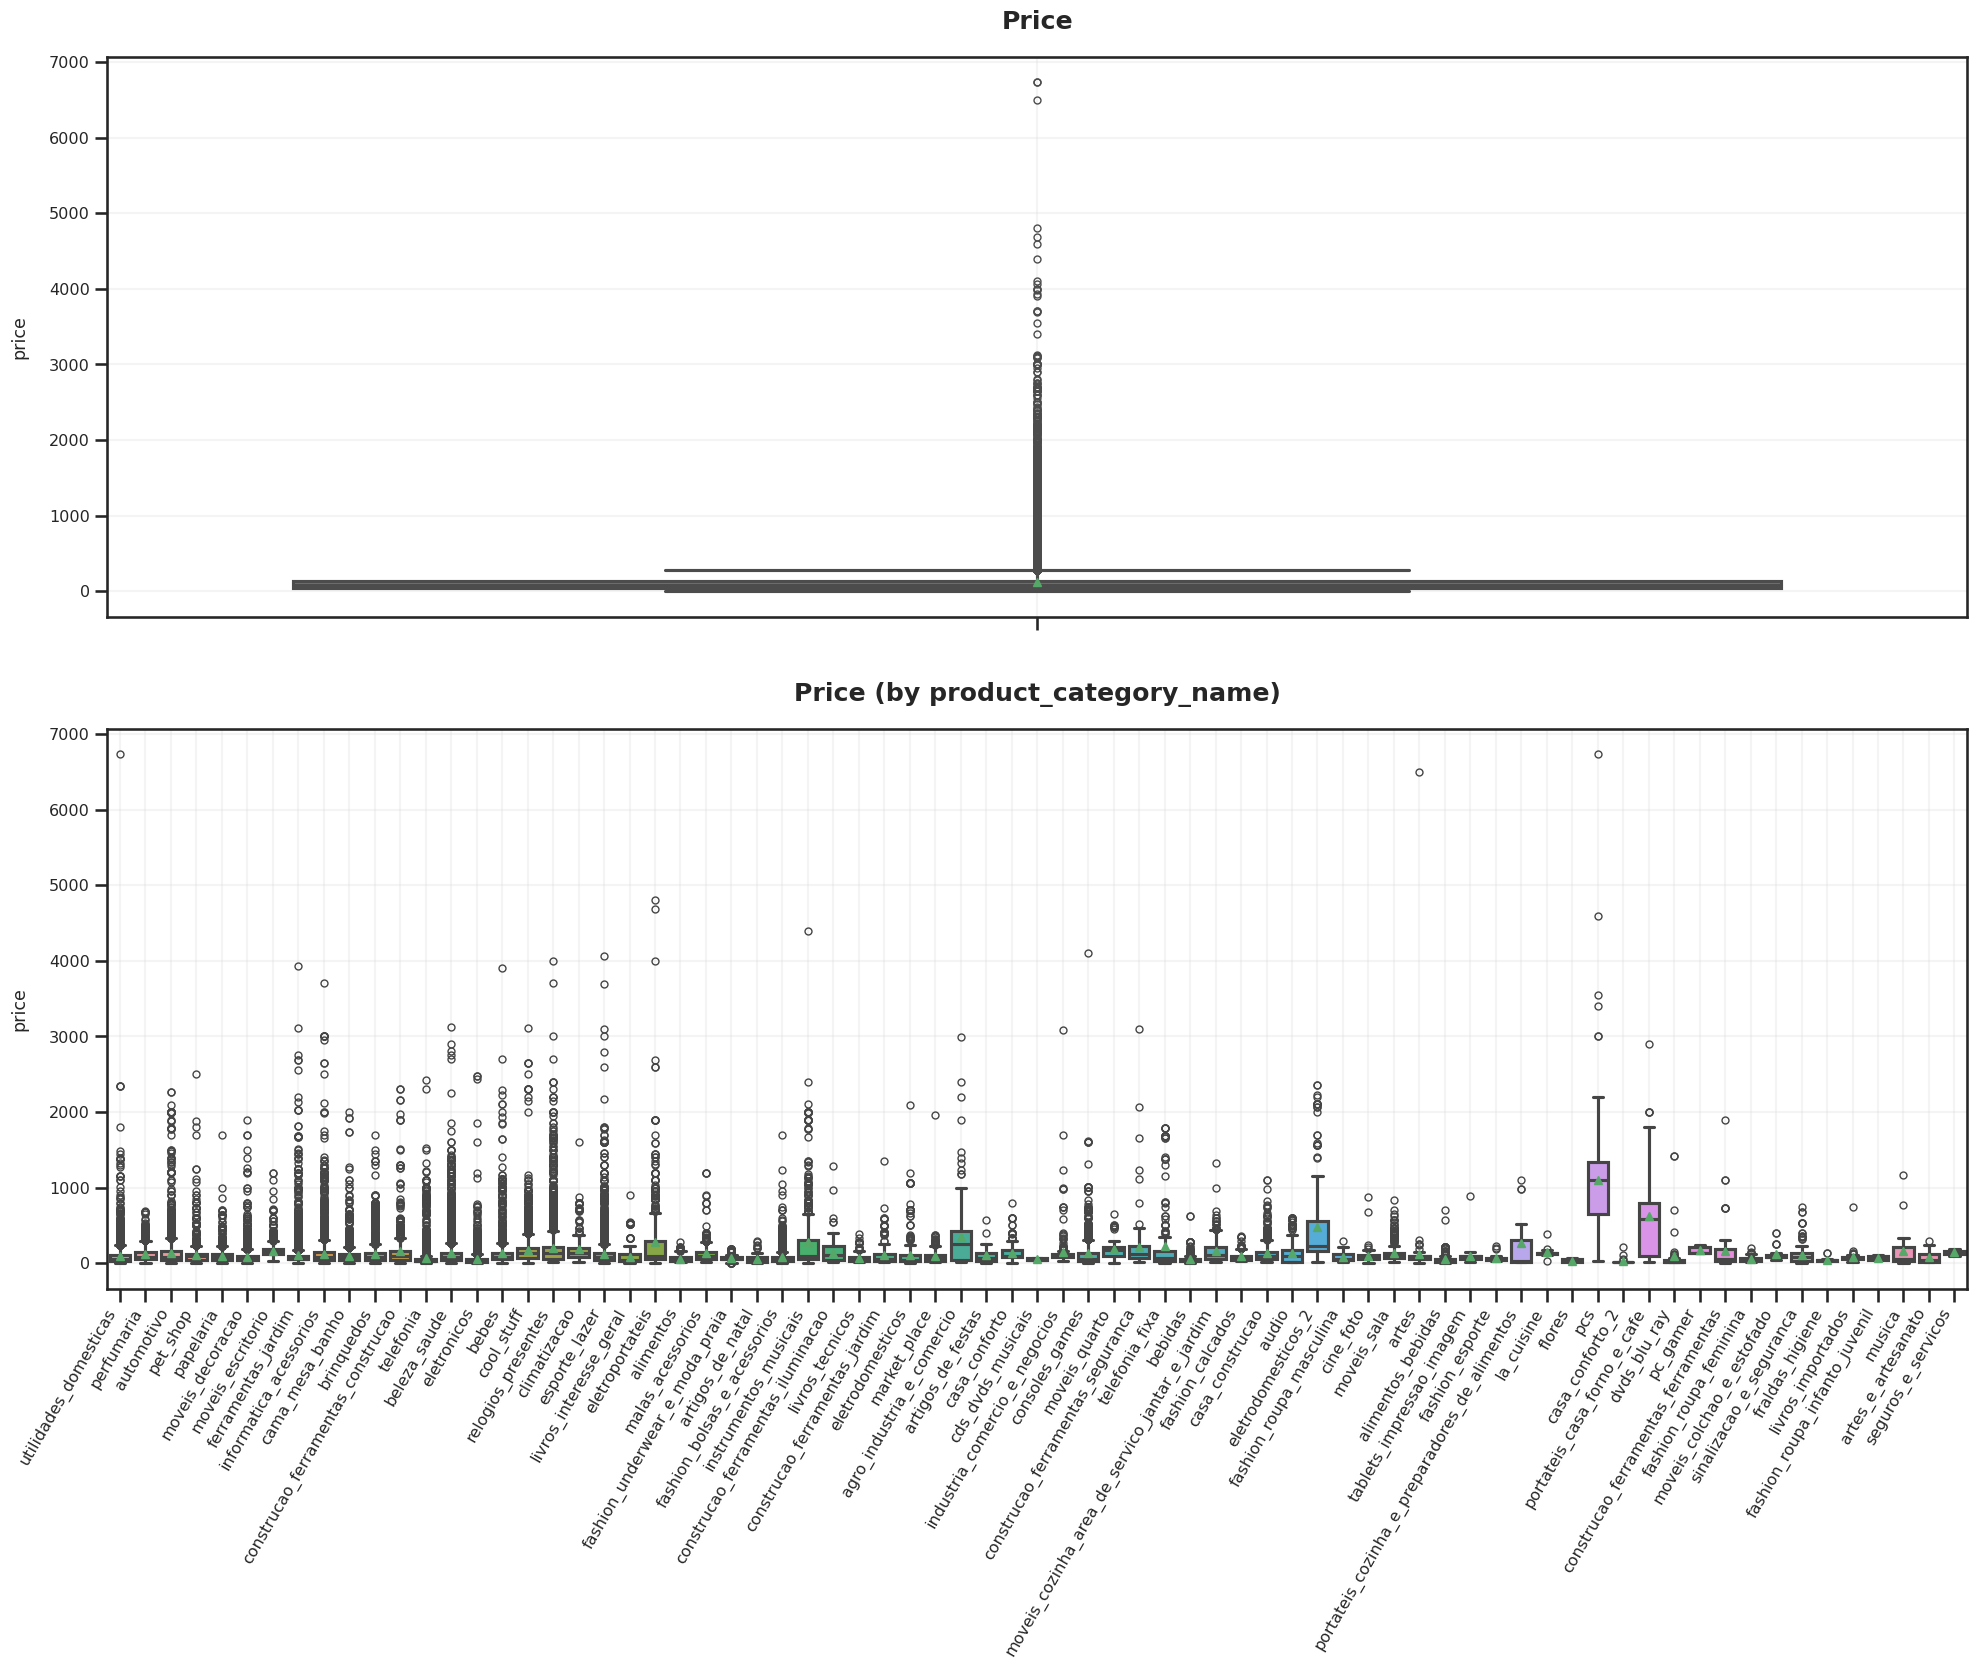

In [36]:
custom_plot(df, title='Price', showmeans=True)

### Power Transform

Making data more Gaussian-like

- Method: [sklearn.preprocessing.PowerTransformer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

In [37]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')
df['price_'] = power.fit_transform(df[['price']])

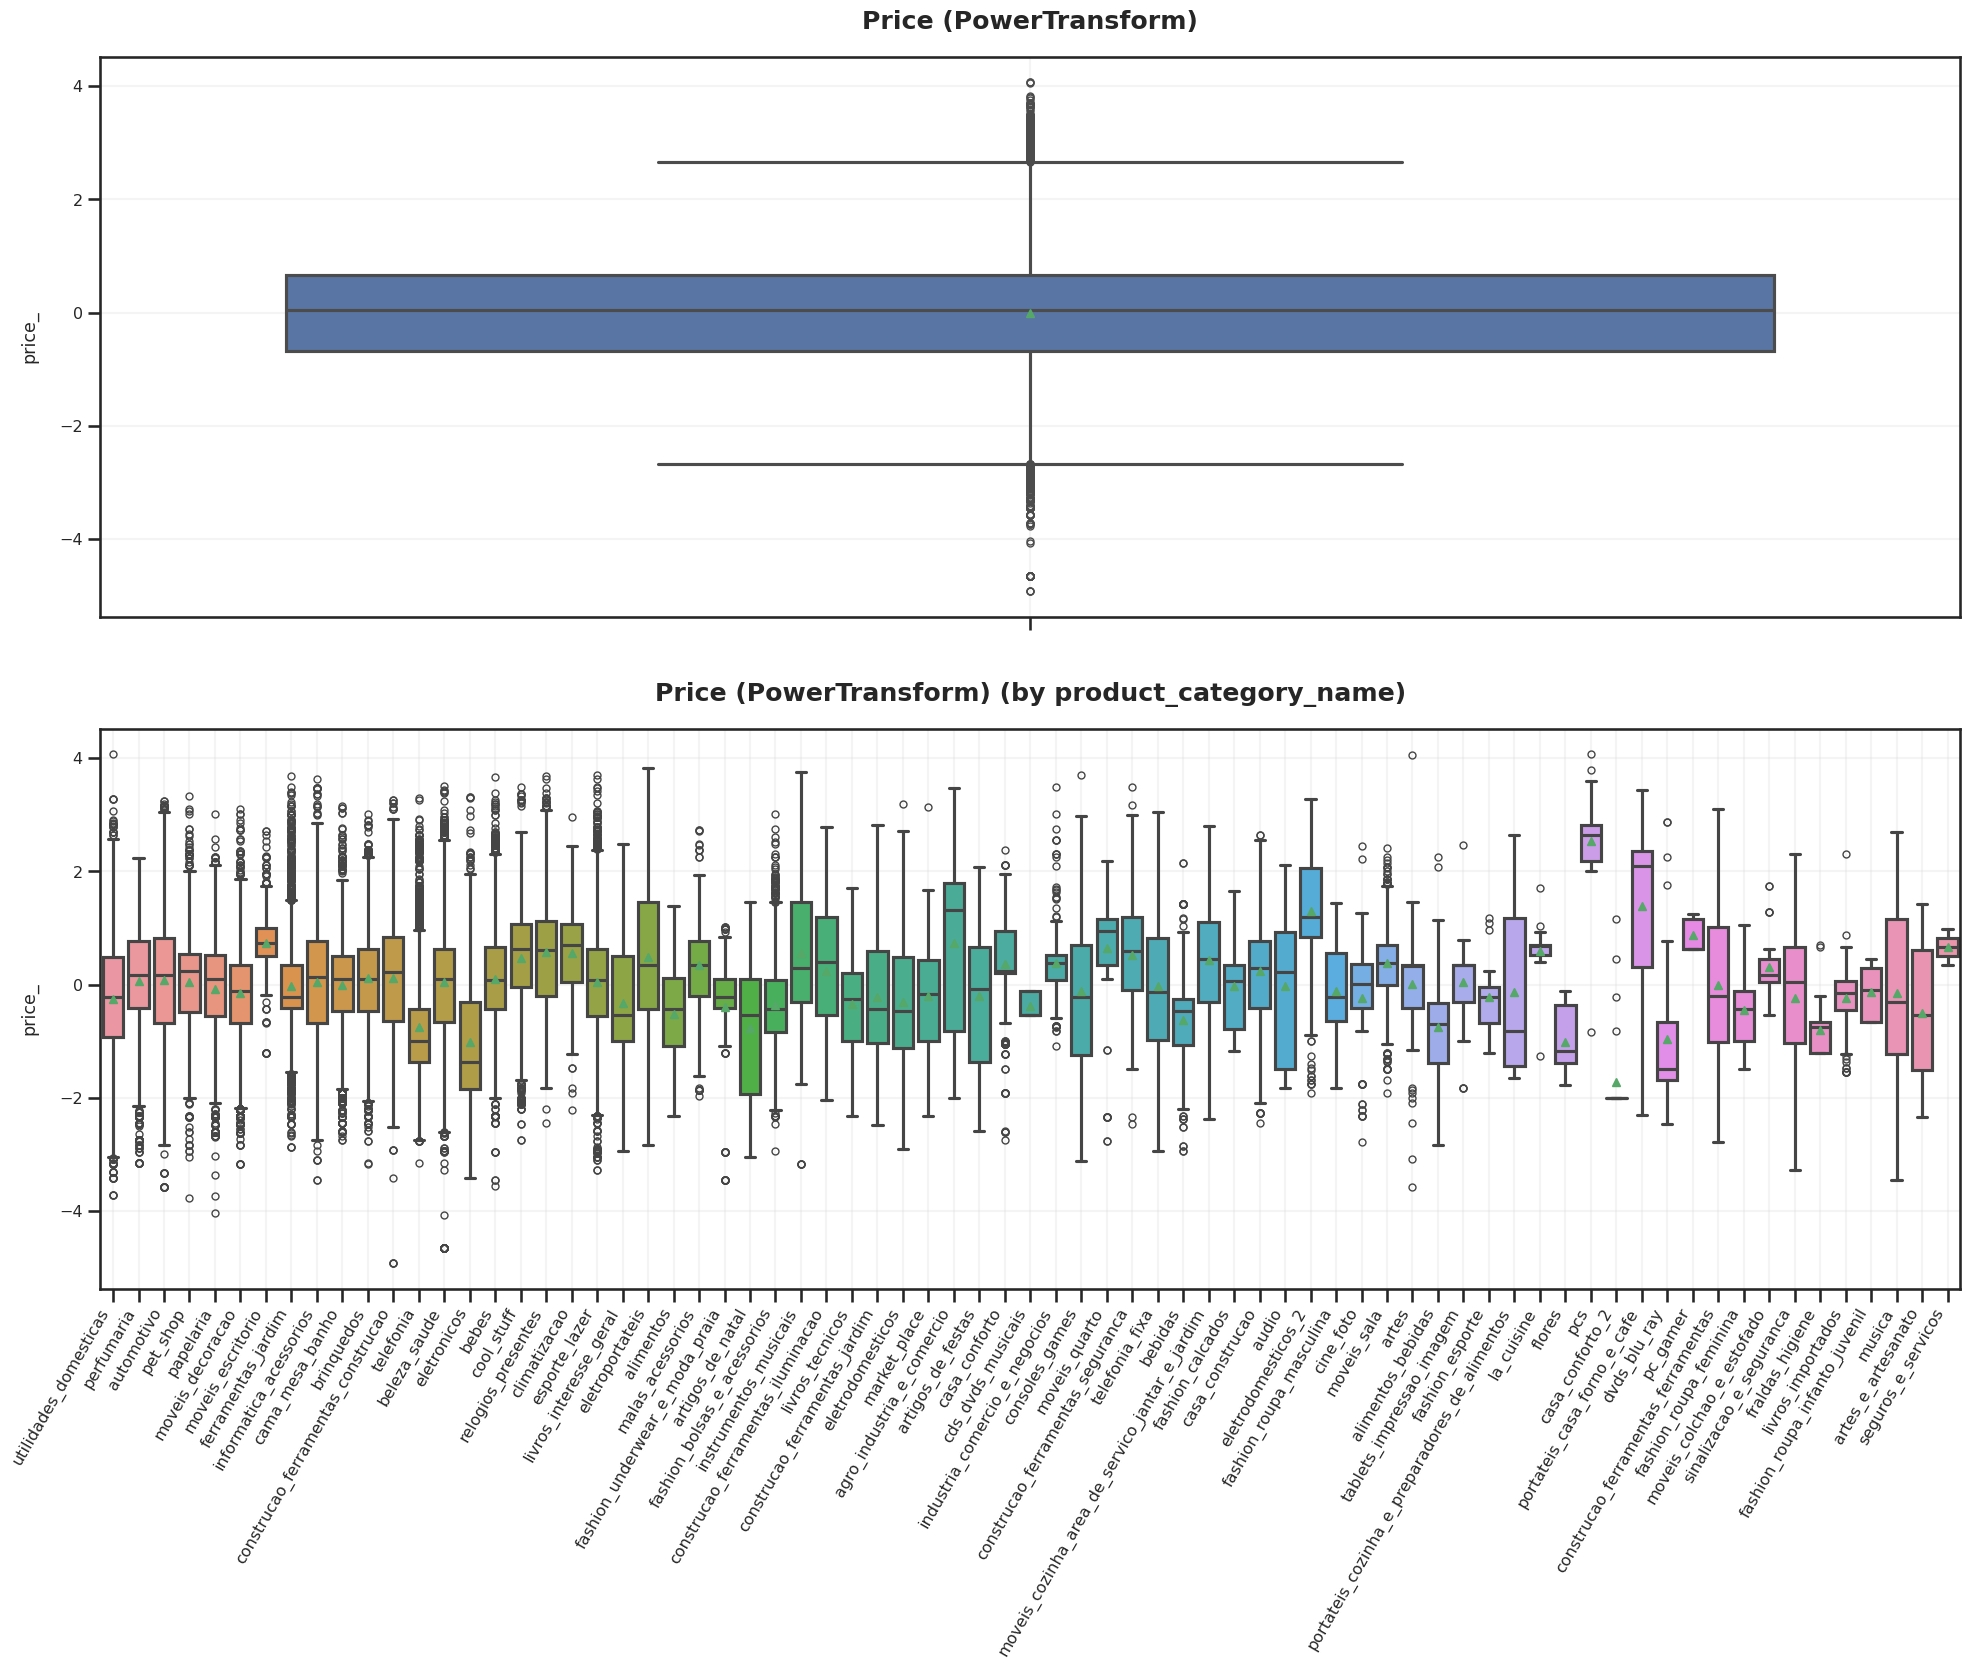

In [38]:
custom_plot(df, x='product_category_name', y='price_', title='Price (PowerTransform)', showmeans=True)

### Scaling

- $\bar{x}$: mean
- $\sigma_x$: standard deviation

$$z = \frac{x-\bar{x}}{\sigma_x}$$


- Method: [sklearn.preprocessing.StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [39]:
from sklearn.preprocessing import StandardScaler

df['price_'] = power.fit_transform(df[['price']])

# complete
scaler = StandardScaler(with_mean=True, with_std=True)
df['price__'] = scaler.fit_transform(df[['price_']])
df[['price', 'price_', 'price__']]

,price,price_,price__
0,29.99,-1.001981,-1.001981
1,29.99,-1.001981,-1.001981
2,29.99,-1.001981,-1.001981
3,29.99,-1.001981,-1.001981
4,118.70,0.529631,0.529631
...,...,...,...
112645,356.00,1.630010,1.630010
112646,356.00,1.630010,1.630010
112647,55.90,-0.288503,-0.288503
112648,72.00,-0.007827,-0.007827


In [40]:
df[['price', 'price_', 'price__']].mean()

price      1.206537e+02
price_     1.283329e-15
price__   -2.598700e-17
dtype: float64

### Clip

- Method: [pd.DataFrame.clip()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html)

_Hint_: [np.clip(x, min, max)](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) for analogous numpy method

In [41]:
# complete
q1 = df['price__'].quantile(0.25)
q3 = df['price__'].quantile(0.75)
iqr = q3 - q1

df['price___'] = df['price__'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

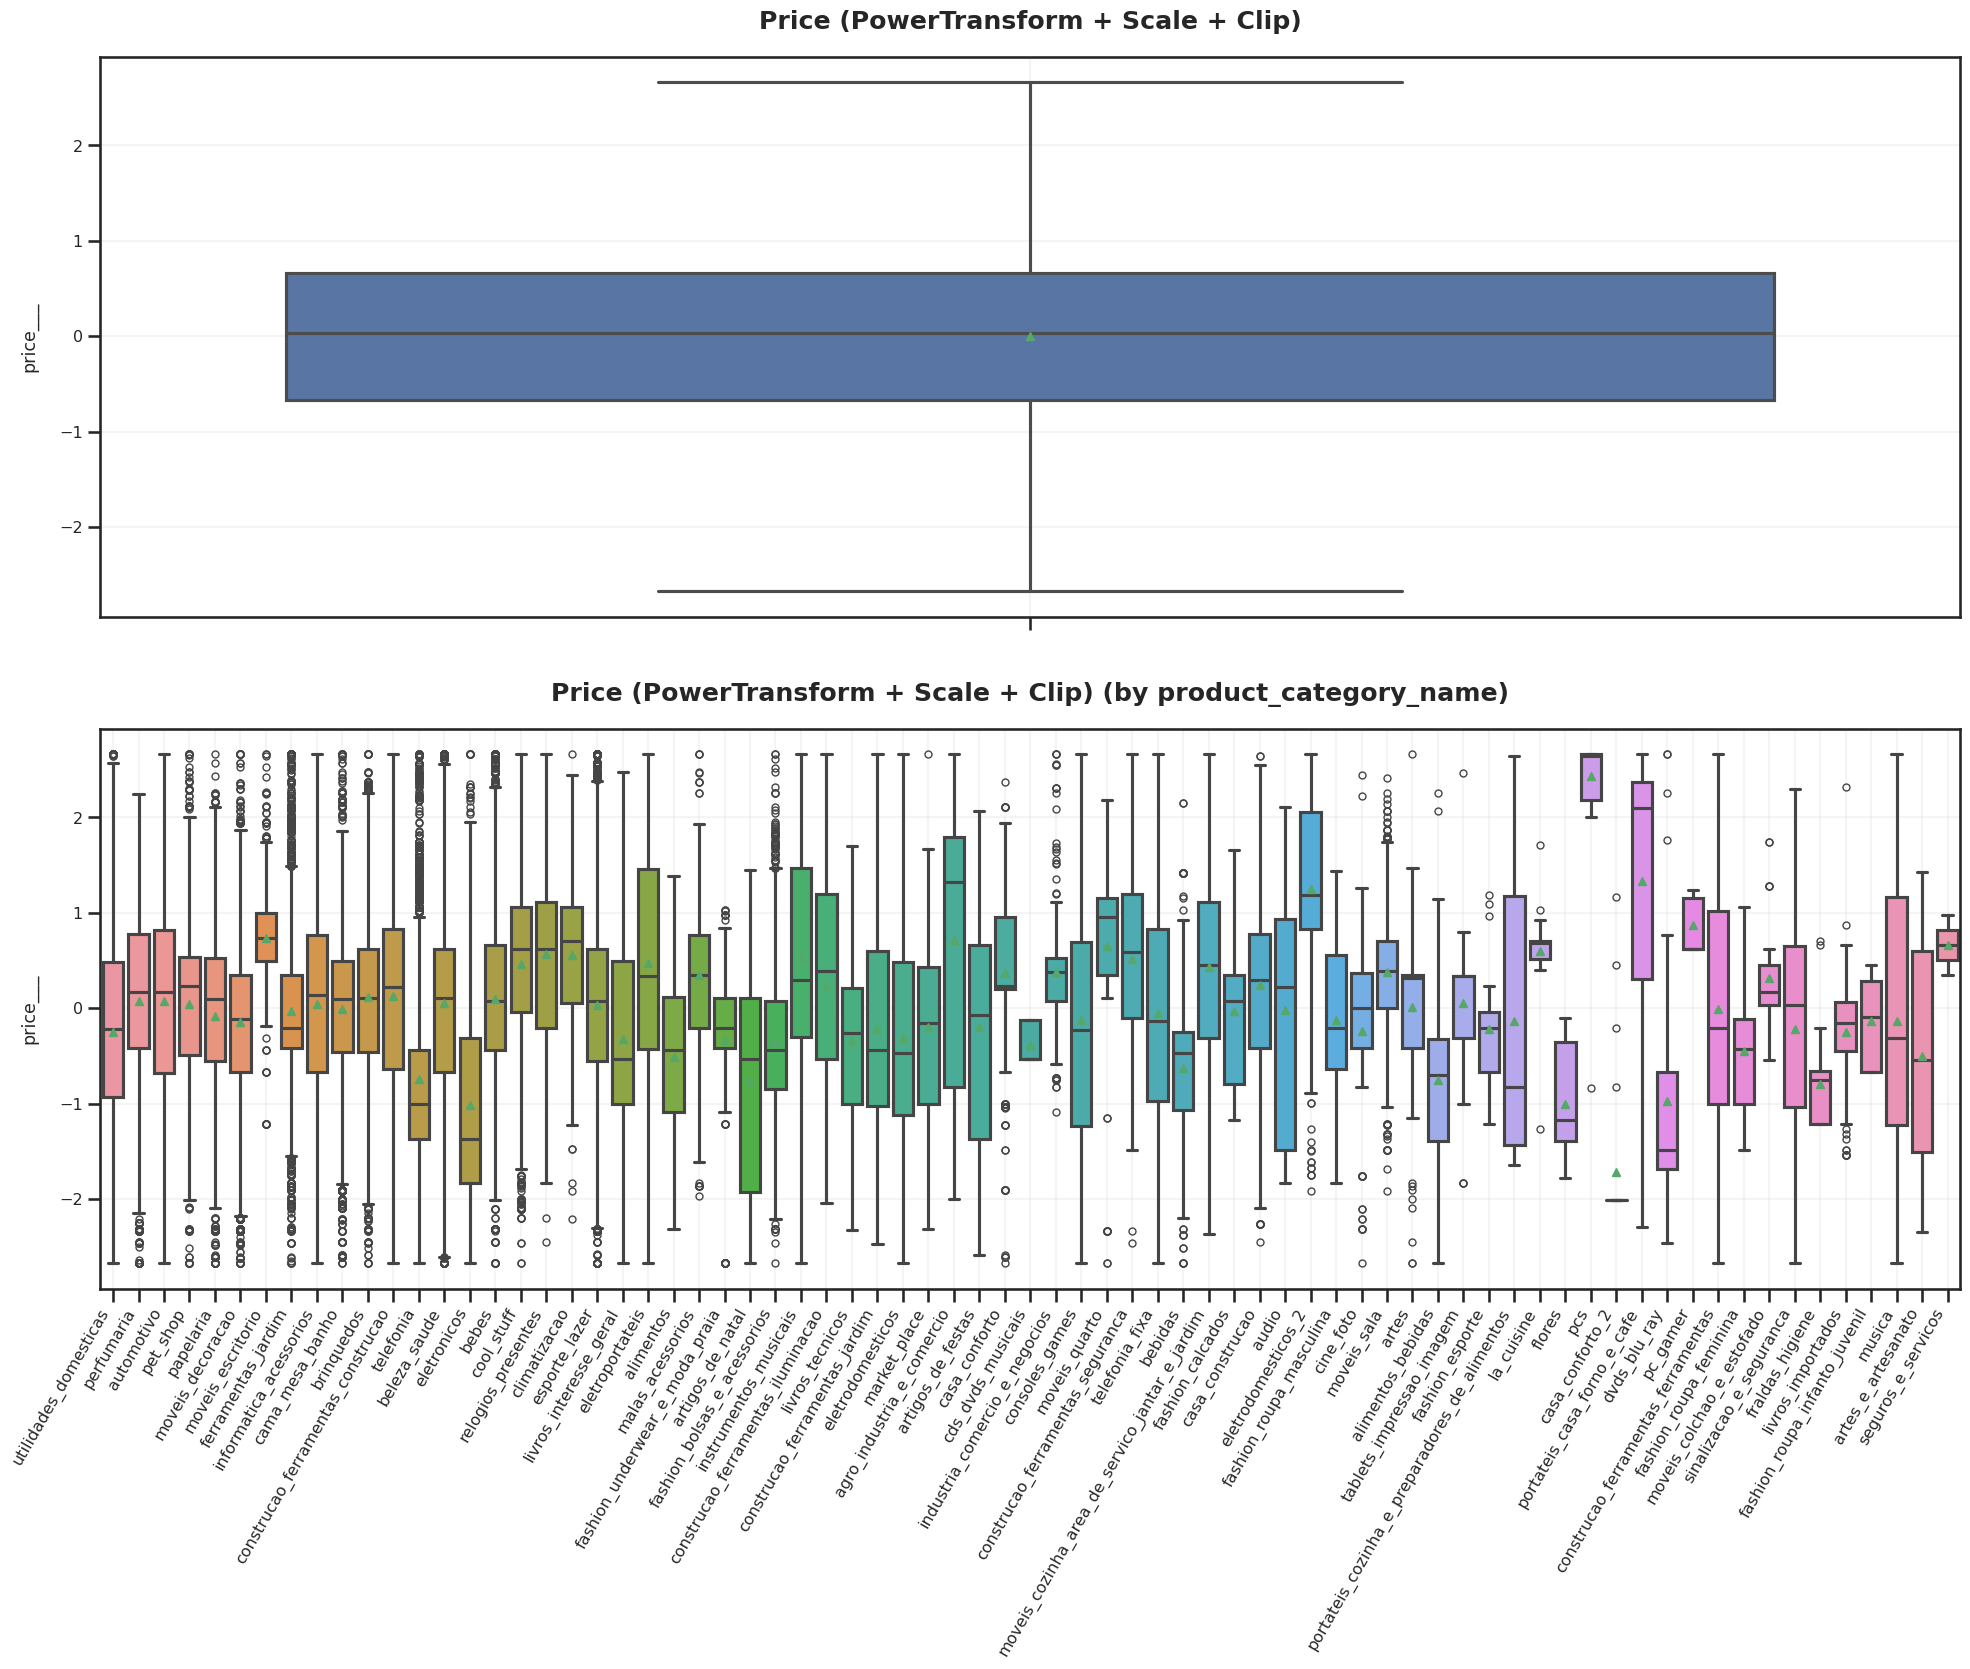

In [ ]:
custom_plot(df, x='product_category_name', y='price___', title='Price (PowerTransform + Scale + Clip)', showmeans=True)

## Building a pipeline

- Method: [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

class ClipTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X):
    self.q1_ = np.quantile(X, 0.25)
    self.q3_ = np.quantile(X, 0.75)
    self.iqr_ = self.q3_ - self.q1_
    self.max_ = self.q3_ + 1.5*self.iqr_
    self.min_ = self.q1_ - 1.5*self.iqr_
    return self

  def transform(self, X):
    X = X.clip(max=self.max_, min=self.min_)
    return X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Complete
pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('power', PowerTransformer()),
    ('scale', StandardScaler()),
    ('clip', ClipTransformer())
])

df['price_cleaned'] = pipeline.fit_transform(df[['price']])
df[['price', 'price_cleaned']].head(10)

,price,price_cleaned
0,29.99,-1.001981
1,29.99,-1.001981
2,29.99,-1.001981
3,29.99,-1.001981
4,118.70,0.529631
5,119.90,0.540210
6,116.90,0.513542
7,119.90,0.540210
8,109.90,0.448309
9,116.90,0.513542


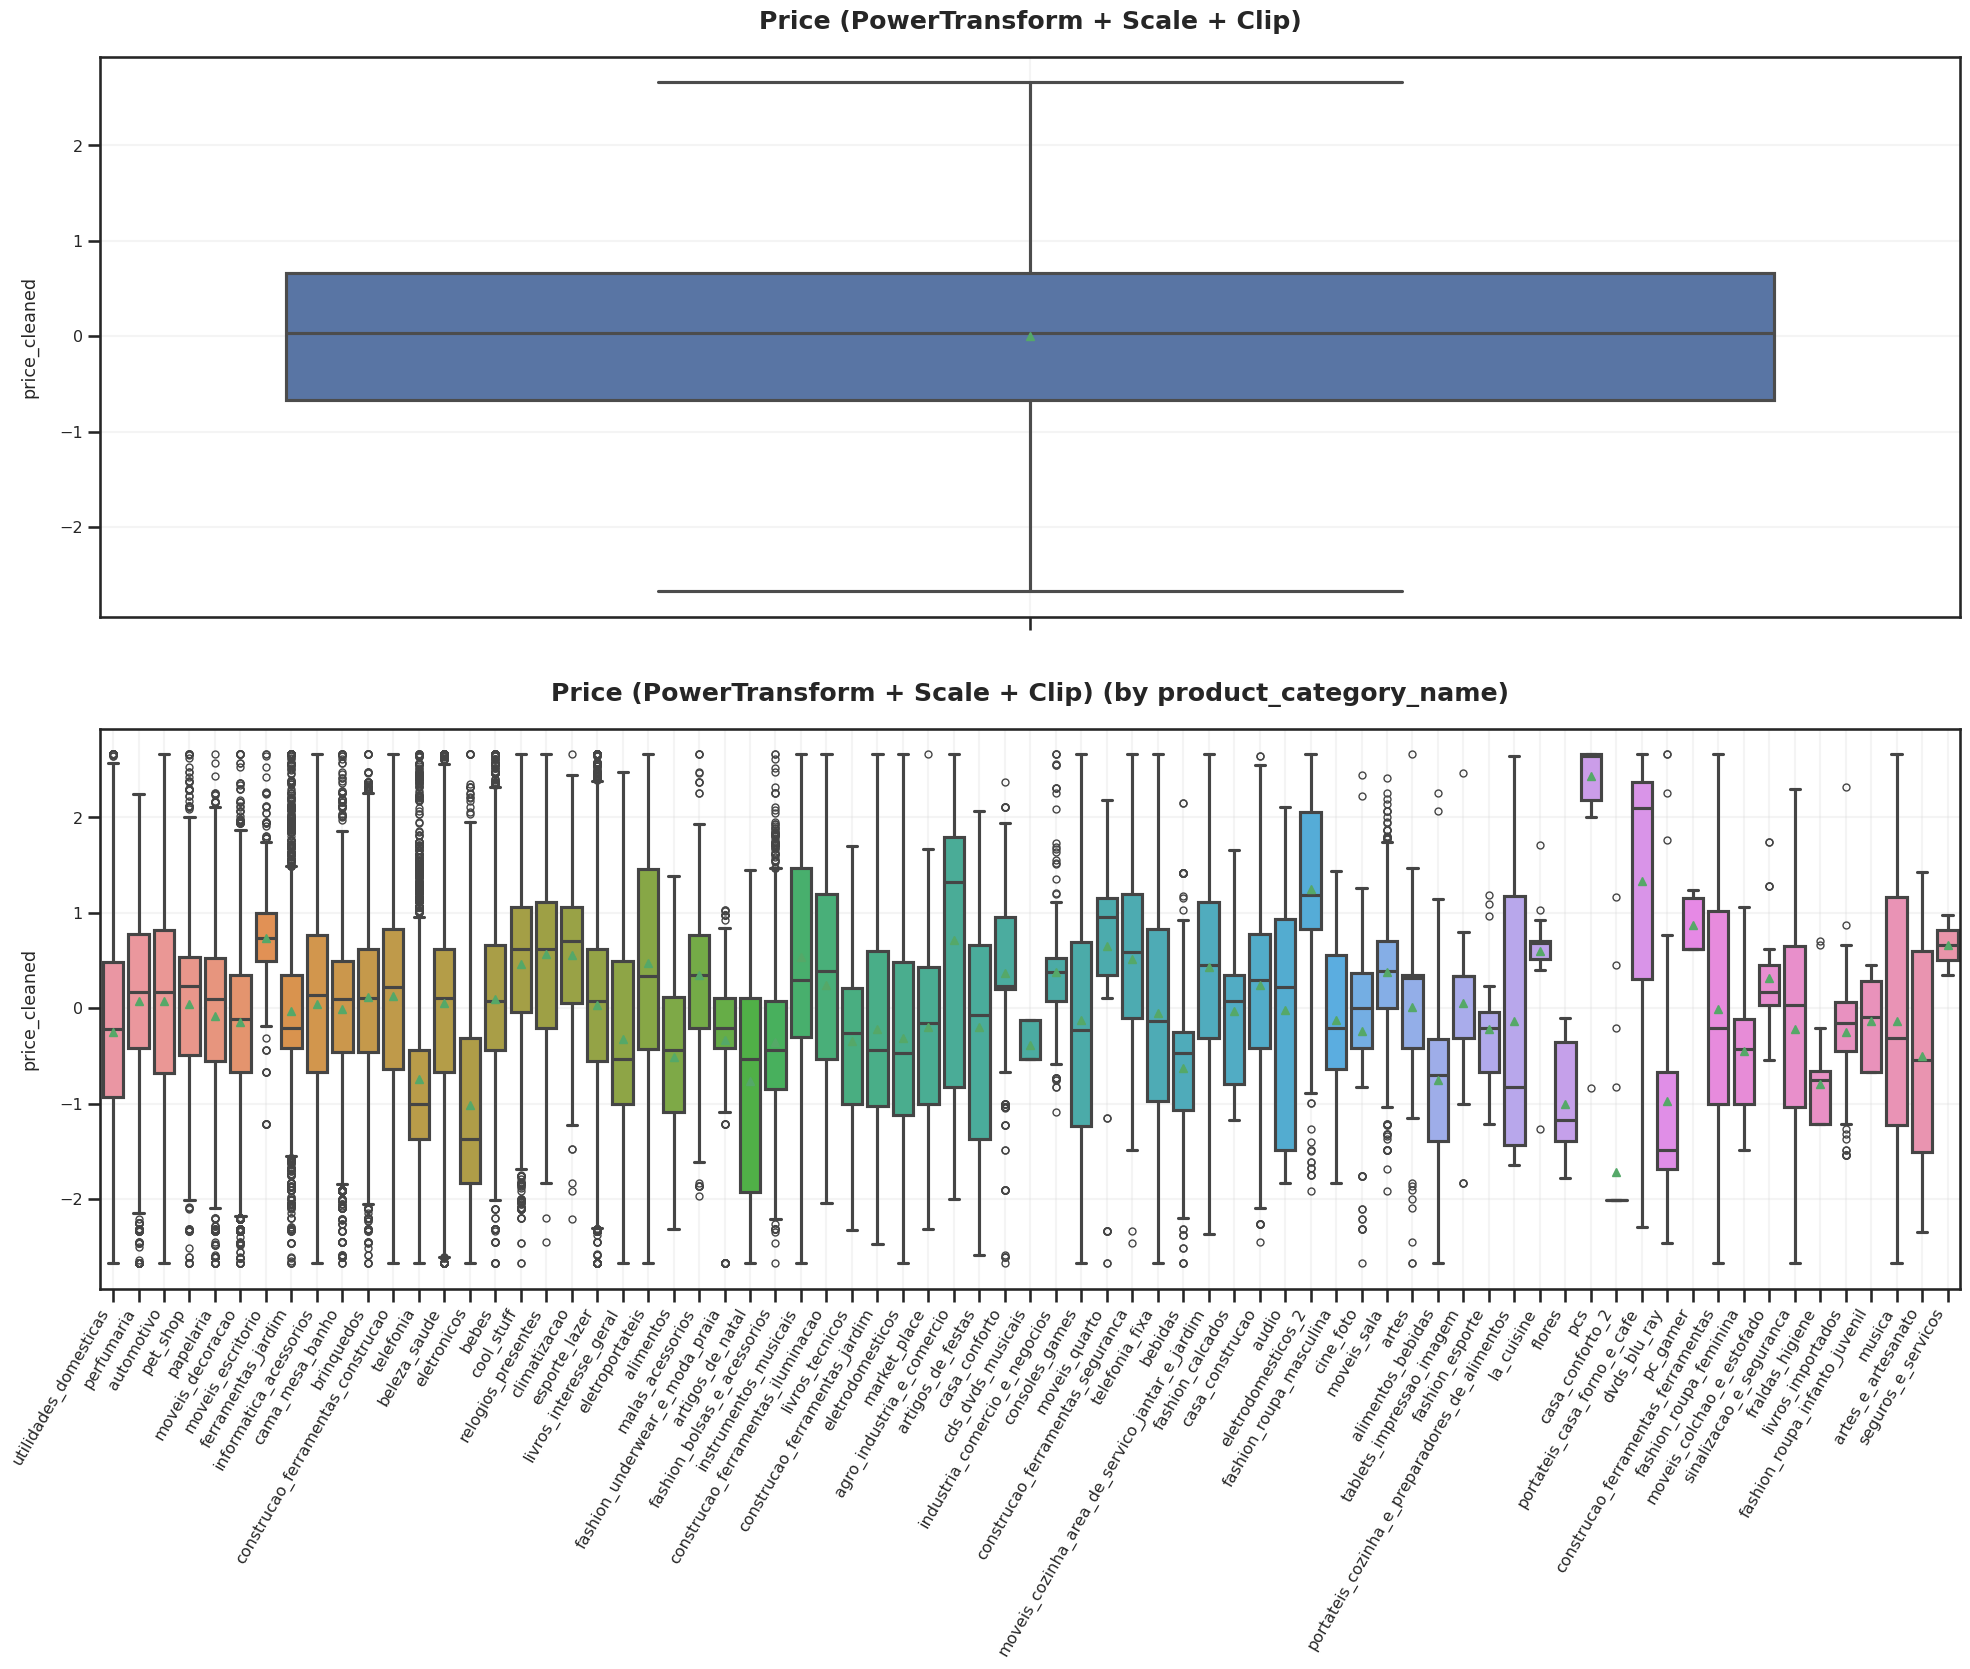

In [ ]:
custom_plot(df, x='product_category_name', y='price_cleaned', title='Price (PowerTransform + Scale + Clip)', showmeans=True)

Checking pipeline statistics

In [ ]:
pipeline.named_steps

{'imputer': SimpleImputer(),
 'power': PowerTransformer(),
 'scale': StandardScaler(),
 'clip': ClipTransformer()}

# Final Tips

- Article: [How to clean your data with Python](https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d)

- Data quality framework: [Great Expectations](https://greatexpectations.io/)

- Data versioning: [DVC](https://dvc.org/)

- _Garbage in, garbage out_